In [60]:
str='''# Clase_W7
### htapia
'''

from os.path import expanduser
who=expanduser('~')
from IPython.display import display, Markdown, Image
from datetime import datetime
now = datetime.now()

display(Markdown(str))
print(now.strftime("%d/%m/%Y %H:%M:%S"))

from vpython import *

# Clase_W7
### htapia


22/03/2023 12:37:25


| Semana     | 7(20-22 mar) |
|------------|----------------|
| Lunes      | **Feriado** |
| Martes     | Tiro parabolico en 2D  |
| Miercoles  | Ejercicios con tiro parabolico en 2D|

## Objetivos generales
Estudiar tiro parabolico en dos dimensiones

## Objetivos especificos
- Modificar la simulacion de caida libre para simular tiro parabolico en dos dimensiones
- Graficar posiciones y velocidades dentro del ambiente de simulacion
- Extraer datos al lenguaje de programacion para procesarlos

## Metodo numerico
Metodo de integracion de Euler para la velocidad y la posicion

### Descripcion de la implementacion
Identica a las empleadas en semanas anteriores

## Listado de codigo
El siguiente codigo simula tiro parabolico utilizando el modulo `vpython`

### Incluir el codigo que se esta generando


In [72]:
# codigo de vpython si lo tienen localmente instalado pueden ejecutarlo
from vpython import *

scene = canvas(title='''Introduccion a la simulacion de objetos fisicos.
Tiro parabolico: aceleracion uniforme cerca de la superficie de la Tierra''')
scene.background=color.black
g1 = graph(xtitle='t[s]', ytitle='y[m]', width=500, height=150)
fp = gcurve(color=color.blue)

g2 = graph(xtitle='t[s]', ytitle='vy[m/s]', width=500, height=150)
fv = gcurve(color=color.red)

h = 20
r = 0.5
g = 9.81 
tc = sqrt(2*h/g)
vx=5
vy=0

masa = sphere(pos=vector(0,h,0), radius=r, color=color.yellow, make_trail=True, trail_type='points', interval=10, retain=10)
piso = box(pos=vector(0,0-r,0),size=vector(14,0.2,4),color=color.white)

t = 0
dt = 0.01
masa.a = vector(0,-g,0)
masa.v = vector(vx,vy,0)
masa.pos = masa.pos + masa.v*dt

while(t<2*tc):
    rate(100)
    # check collision with floor
    if masa.pos.y < piso.pos.y + 0.5*masa.radius:
        masa.v.y = -masa.v.y
    # update velocity
    masa.v = masa.v + masa.a*dt
    # update position
    masa.pos = masa.pos + masa.v*dt
    # plot handle
    fp.plot(t, masa.pos.y)
    fv.plot(t, masa.v.y)
    # update time
    t = t+dt

<IPython.core.display.Javascript object>

In [76]:
masa.

1.0

## Visualizacion de los resultados
### Incluir imagenes, graficas y demas recursos de visualizacion 

La siguiente celda toma una captura de la escena la guarda y la cambia de directorio para despues mostrarla.

In [61]:
fn="TiroParabolico"
fp = ''.join((who,'\Downloads','\\',fn,'.png'))
scene.capture(fn)
!move {fp} %cd%
Image(''.join((fn,'.png')))

        1 file(s) moved.


## Discusion
El tiro parabolico en dos dimensiones se obtiene directamente de caida librea cmbiando las condiciones inciales.




## Critica
El codigo anterior se generalizo de manera simple a partir del codigo construido para el objeto en caida libre simplemente modificando las condiciones iniciales de la velocidad. Sin embargo tal y como esta planteado estamos a merced del marco de trabajo del simulador. Seria conveniente poder extraer los datos de simulacion de manera  efectiva para poder procesarlos usando el lenguaje de progamacion. Una forma simple de hacerlo es repitiendo el codigo unicamente considerando los elementeos de la simulacion, es decir ignorar los componentes graficos.

In [115]:
# let's modify the code as:
scene = canvas(title='''Introduccion a la simulacion de objetos fisicos.
Tiro parabolico: aceleracion uniforme cerca de la superficie de la Tierra''')
scene.background=color.black

h = 20
r = 0.5
g = 9.81 
tc = sqrt(2*h/g)
vx=5
vy=0

masa = sphere(pos=vector(0,h,0), radius=r, color=color.yellow, make_trail=True, trail_type='points', interval=10, retain=10)
piso = box(pos=vector(0,0-r,0),size=vector(14,0.2,4),color=color.white)
data=[]
print(data)
t = 0
dt = 0.01
masa.a = vector(0,-g,0)
masa.v = vector(vx,vy,0)
data.append([t, masa.pos, masa.v])
print(data)

while(t<2*tc):
    rate(100)
    # check collision with floor
    if masa.pos.y < piso.pos.y + 0.5*masa.radius:
        masa.v.y = -masa.v.y
    # update velocity
    masa.v = masa.v + masa.a*dt
    # update position
    masa.pos = masa.pos + masa.v*dt
    # update time
    t = t+dt
    # data.append([t, masa.pos, masa.v])
    print(masa.pos)

<IPython.core.display.Javascript object>

[]
[[0, <0, 20, 0>, <5, 0, 0>]]
<0.05, 19.999, 0>
<0.1, 19.9971, 0>
<0.15, 19.9941, 0>
<0.2, 19.9902, 0>
<0.25, 19.9853, 0>
<0.3, 19.9794, 0>
<0.35, 19.9725, 0>
<0.4, 19.9647, 0>
<0.45, 19.9559, 0>
<0.5, 19.946, 0>
<0.55, 19.9353, 0>
<0.6, 19.9235, 0>
<0.65, 19.9107, 0>
<0.7, 19.897, 0>
<0.75, 19.8823, 0>
<0.8, 19.8666, 0>
<0.85, 19.8499, 0>
<0.9, 19.8322, 0>
<0.95, 19.8136, 0>
<1, 19.794, 0>
<1.05, 19.7734, 0>
<1.1, 19.7518, 0>
<1.15, 19.7292, 0>
<1.2, 19.7057, 0>
<1.25, 19.6812, 0>
<1.3, 19.6557, 0>
<1.35, 19.6292, 0>
<1.4, 19.6017, 0>
<1.45, 19.5733, 0>
<1.5, 19.5438, 0>
<1.55, 19.5134, 0>
<1.6, 19.482, 0>
<1.65, 19.4497, 0>
<1.7, 19.4163, 0>
<1.75, 19.382, 0>
<1.8, 19.3467, 0>
<1.85, 19.3104, 0>
<1.9, 19.2731, 0>
<1.95, 19.2348, 0>
<2, 19.1956, 0>
<2.05, 19.1554, 0>
<2.1, 19.1142, 0>
<2.15, 19.072, 0>
<2.2, 19.0288, 0>
<2.25, 18.9847, 0>
<2.3, 18.9395, 0>
<2.35, 18.8934, 0>
<2.4, 18.8463, 0>
<2.45, 18.7983, 0>
<2.5, 18.7492, 0>
<2.55, 18.6992, 0>
<2.6, 18.6482, 0>
<2.65, 18.5962, 0

In [111]:
t=[d[0] for d in data]
r=[d[1] for d in data]
v=[d[2] for d in data]

In [112]:
rx=[rv.x for rv in r]
ry=[rv.y for rv in r]

vx=[rv.x for rv in v]
vy=[rv.y for rv in v]


In [84]:
import matplotlib.pyplot as plt

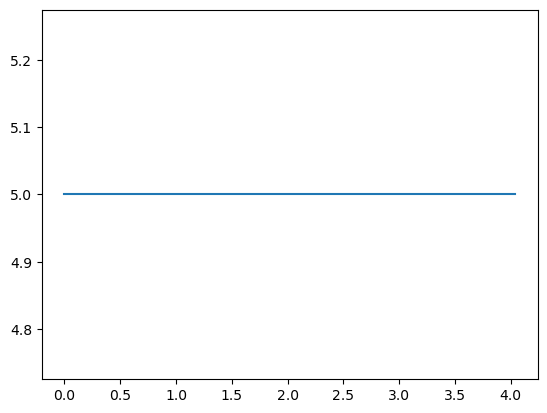

In [114]:
plt.plot(t,vx)